In [263]:
import pandas as pd
import random
import numpy as np
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [242]:
from google.colab import drive
drive.mount ('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [264]:
# Load the wheat seeds dataset into a pandas dataframe

path = '/content/seeds_dataset.txt'

In [265]:
header= ["Area","Perimeter","Compactness","Length of kernel","Width of kernel","Asymmetry coefficient","Groove"]
df=pd.read_csv(path, delimiter=r'[\t]+', names=header+['Class'])
df.head()

/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


,Area,Perimeter,Compactness,Length of kernel,Width of kernel,Asymmetry coefficient,Groove,Class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [245]:
from sklearn.impute import SimpleImputer
import numpy as np
imr = SimpleImputer(missing_values=np.nan, strategy='mean')
imr = imr.fit(df.values)
imputed_data = imr.transform(df.values)
imputed_data

array([[15.26  , 14.84  ,  0.871 , ...,  2.221 ,  5.22  ,  1.    ],
       [14.88  , 14.57  ,  0.8811, ...,  1.018 ,  4.956 ,  1.    ],
       [14.29  , 14.09  ,  0.905 , ...,  2.699 ,  4.825 ,  1.    ],
       ...,
       [13.2   , 13.66  ,  0.8883, ...,  8.315 ,  5.056 ,  3.    ],
       [11.84  , 13.21  ,  0.8521, ...,  3.598 ,  5.044 ,  3.    ],
       [12.3   , 13.34  ,  0.8684, ...,  5.637 ,  5.063 ,  3.    ]])

In [246]:
cell_data = str(df.iloc[0, 2])
display(cell_data)

'0.871'

In [247]:
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    
    # X = X.to_numpy()
    # y = y.to_numpy()
    # setup marker generator and color map
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=f'Class {cl}', 
                    edgecolor='black')
    # highlight test examples
    if test_idx:
    # plot all examples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='none',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='Test set')

In [248]:
# Set the percentage of features to randomize
percentage_to_randomize = 30

# Randomly select the cells to be randomized
n_features_to_randomize = int(df.shape[1] * percentage_to_randomize / 100)
features_to_randomize = np.random.choice(df.columns, n_features_to_randomize, replace=False)

# Randomize the selected cells
for feature in features_to_randomize:
    n_cells_to_randomize = int(df.shape[0] * percentage_to_randomize / 100)
    cells_to_randomize = np.random.choice(df.index, n_cells_to_randomize, replace=False)
    df.loc[cells_to_randomize, feature] = np.random.rand(n_cells_to_randomize)

In [249]:
X = df.iloc[:, [2,4]].values
X=X.astype('float64')
#print(X)
y = df.iloc[:, 7].values
y=y.astype('int64')
#print (y)
print('Class labels:', np.unique(y))

Class labels: [0 1 2 3]


In [250]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [251]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [252]:
# Train a Logistic Regression model on the randomized dataset
clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression()

In [253]:
# Evaluate the model on the test set
accuracy = clf.score(X_test, y_test)
print(f"Accuracy of Logistic Regression model trained on randomized dataset: {accuracy}")

Accuracy of Logistic Regression model trained on randomized dataset: 0.49206349206349204


predicted: [0 3 0 3 2 2 0 3 3 3 0 2 0 0 3 3 3 0 0 0 0 0 2 3 0 3 0 3 0 2 2 2 2 0 0 2 3
 2 3 3 0 3 2 3 2 2 3 3 2 3 2 3 0 2 3 0 3 3 0 3 2 0 2]
true class: [0 0 0 3 0 0 1 0 3 0 2 0 1 0 1 0 3 1 1 1 1 0 2 3 1 3 1 3 1 2 2 0 2 1 1 0 0
 2 1 0 1 3 2 3 2 0 3 3 2 3 2 3 0 2 0 1 3 3 1 3 0 1 2]


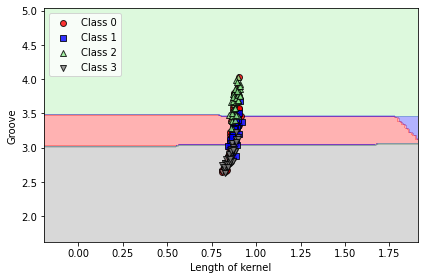

In [254]:
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)
y_pred= log_reg.predict(X_test)
print('predicted:',y_pred)
print('true class:', np.array(y_test))
plot_decision_regions(X, y, classifier=log_reg)
plt.xlabel(df.columns[3])
plt.ylabel(df.columns[6])
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

Selected a learning algorithm andimputed solutions from scikit learn to compare results from the unaffected original data.

In [273]:
#creating a SimpleImputer class from scikit-learn library and setting the imputation strategy to median
imp = SimpleImputer(strategy='median')

In [274]:
#selects a subset of columns from the dataframe
X = df.loc[:, header]
y = df.loc[:, 'Class'].values

In [275]:
#splits the x and y data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [276]:
#imputes missing values in the x_train and x_test
imp.fit(X_train)
X_train_imputed = imp.fit_transform(X_train)
X_test_imputed = imp.transform(X_test)

In [277]:
#creating a dataset with 15% missing values at random locations
n_rows, n_cols = X.shape
n_rows, n_cols = X.shape
n_cells = int(n_rows * n_cols * 0.15) 
indices = np.random.choice(n_rows*n_cols, n_cells, replace=False)
row_indices = indices // n_cols
col_indices = indices % n_cols
X.values[row_indices, col_indices] = np.nan

In [278]:
#checking quality of data 
print(X.isna().sum())
print(X.head(50))

Area                     34
Perimeter                23
Compactness              30
Length of kernel         37
Width of kernel          27
Asymmetry coefficient    31
Groove                   38
dtype: int64
     Area  Perimeter  Compactness  Length of kernel  Width of kernel  \
0   15.26      14.84       0.8710             5.763            3.312   
1   14.88      14.57       0.8811             5.554            3.333   
2   14.29      14.09       0.9050             5.291            3.337   
3   13.84      13.94       0.8955             5.324            3.379   
4   16.14      14.99       0.9034             5.658            3.562   
5   14.38      14.21       0.8951             5.386            3.312   
6   14.69      14.49       0.8799             5.563            3.259   
7   14.11      14.10       0.8911               NaN            3.302   
8   16.63      15.46       0.8747             6.053              NaN   
9   16.44      15.25       0.8880             5.884            3.505   

In [279]:
#checks the quality of the imputed data
X_imputed = imp.fit_transform(X)
print('Number of NaN values before imputation:\n', np.isnan(X).sum())
print('Number of NaN values after imputation:', np.isnan(X_imputed).sum())
print(X_imputed[:50])

Number of NaN values before imputation:
 Area                     34
Perimeter                23
Compactness              30
Length of kernel         37
Width of kernel          27
Asymmetry coefficient    31
Groove                   38
dtype: int64
Number of NaN values after imputation: 0
[[15.26    14.84     0.871    5.763    3.312    2.221    5.22   ]
 [14.88    14.57     0.8811   5.554    3.333    1.018    4.956  ]
 [14.29    14.09     0.905    5.291    3.337    2.699    4.825  ]
 [13.84    13.94     0.8955   5.324    3.379    2.259    4.805  ]
 [16.14    14.99     0.9034   5.658    3.562    1.355    5.175  ]
 [14.38    14.21     0.8951   5.386    3.312    2.462    4.956  ]
 [14.69    14.49     0.8799   5.563    3.259    3.586    5.219  ]
 [14.11    14.1      0.8911   5.516    3.302    2.7      5.     ]
 [16.63    15.46     0.8747   6.053    3.259    2.04     5.226  ]
 [16.44    15.25     0.888    5.884    3.505    1.969    5.533  ]
 [15.26    14.85     0.8696   5.714    3.242    4